In [37]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os

In [38]:
current_dir = os.getcwd()

# current_dir = os.path.dirname(os.path.abspath(__file__))
csv_path = os.path.join(current_dir, "..", "Data", "holland_data.csv")
csv_path = os.path.abspath(csv_path)

In [39]:
data_raw=pd.read_csv(csv_path,delimiter='\t')
data_raw.info

C:\Users\usEr\AppData\Local\Temp\ipykernel_3376\485099286.py:1: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw=pd.read_csv(csv_path,delimiter='\t')


<bound method DataFrame.info of         R1  R2  R3  R4  R5  ...  uniqueNetworkLocation  country  source  \
0        3   4   3   1   1  ...                      1       US       2   
1        1   1   2   4   1  ...                      1       US       1   
2        2   1   1   1   1  ...                      1       US       1   
3        3   1   1   2   2  ...                      1       CN       0   
4        4   1   1   2   1  ...                      1       PH       0   
...     ..  ..  ..  ..  ..  ...                    ...      ...     ...   
145823   2   1   1   1   1  ...                      1       US       1   
145824   1   1   1   1   1  ...                      1       US       1   
145825   1   1   1   1   1  ...                      1       US       2   
145826   3   4   4   5   2  ...                      2       US       0   
145827   2   4   1   4   2  ...                      1       US       1   

                      major  Unnamed: 93  
0                       

In [40]:
data = data_raw.copy()
pd.options.display.max_columns = 150
data.drop(data.columns[48:], axis=1, inplace=True)
print('Number of participants: ', len(data))
data.head()

Number of participants:  145828


,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,I3,I4,I5,I6,I7,I8,A1,A2,A3,A4,A5,A6,A7,A8,S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8
0,3,4,3,1,1,4,1,3,5,5,4,3,4,5,4,3,5,4,1,2,4,5,2,4,3,5,5,4,5,5,5,5,2,1,4,1,2,2,1,3,1,3,1,1,1,3,1,1
1,1,1,2,4,1,2,2,1,5,5,5,4,4,4,4,4,2,1,4,2,1,3,4,2,2,3,4,3,4,2,3,1,1,1,1,1,1,1,1,3,1,1,2,1,1,2,1,1
2,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,2,1,1,3,1,3,1,5,3,5,5,4,4,1,3,3,5,1,4,4,3,1,3,2,2,1,2,4,1
3,3,1,1,2,2,2,2,2,4,1,2,4,3,2,3,2,5,2,4,5,1,4,4,2,4,2,3,3,2,1,3,2,5,4,3,2,3,3,2,3,3,2,3,3,2,2,2,2
4,4,1,1,2,1,1,1,2,5,5,5,3,5,5,5,3,3,5,5,5,5,5,1,5,5,4,4,4,5,5,5,5,2,3,2,3,2,4,2,2,4,2,2,4,5,5,2,2


In [41]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib


df = data
columns = list(df.columns)

scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
# This (scaler ) is created just for sake of ease of calculation for clustering 
df = df.dropna(axis=0)
df_sample = df

In [42]:
root_dir = os.path.abspath(os.path.join(current_dir, "..","artifacts"))
joblib.dump(scaler, os.path.join(root_dir, 'holland_scaler.pkl'))

['c:\\Users\\usEr\\Documents\\GitHub\\Career-path-guidance-web-application\\ML\\artifacts\\holland_scaler.pkl']

In [43]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

n_label = 6
result = []
n_runs = 100

traits = {
    'Realistic': ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8'],
    'Investigative': ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8'],
    'Artistic': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
    'Social': ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'],
    'Enterprising': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
    'Conventional' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
}

for run in range(n_runs):
    kmeans = KMeans(n_clusters=n_label)
    k_fit = kmeans.fit(df_sample)

    # Predicting the Clusters
    pd.options.display.max_columns = 10

    #labels_ is used to identify Labels of each point
    predictions = k_fit.labels_
    df_sample['Clusters'] = predictions
    # df_sample.head(10)

    # คำนวณค่าเฉลี่ยในแต่ละกลุ่ม
    cluster_trait_means = {}
    for trait, columns in traits.items():
        cluster_trait_means[trait] = df_sample[columns].mean(axis=1).groupby(df_sample['Clusters']).mean()





In [44]:
value_counts = df_sample['Clusters'].value_counts()
print(value_counts)

Clusters
2    49685
1    36955
5    21403
0    17837
3    11560
4     8388
Name: count, dtype: int64


In [45]:
current_dir = os.getcwd()
csv_dir = os.path.abspath(os.path.join(current_dir, "..", "Data"))  # Path to folder
csv_path = os.path.join(csv_dir, "label_data_holland.csv")          # Full path with filename

df_sample.to_csv(csv_path, index=False)
print("Saved CSV to:", csv_path)

Saved CSV to: c:\Users\usEr\Documents\GitHub\Career-path-guidance-web-application\ML\Data\label_data_holland.csv


In [46]:
# สร้าง DataFrame แสดงค่าเฉลี่ย
cluster_means = pd.DataFrame(cluster_trait_means)

cluster_means.index = range(n_label)

# Convert the DataFrame to a numpy array
array = cluster_means.values.T  # Transpose to have clusters as columns and traits as rows

result.append(array)
# print(cluster_means)

In [47]:
df_sample

,R1,R2,R3,R4,R5,...,C5,C6,C7,C8,Clusters
0,0.6,0.8,0.6,0.2,0.2,...,0.2,0.6,0.2,0.2,1
1,0.2,0.2,0.4,0.8,0.2,...,0.2,0.4,0.2,0.2,4
2,0.4,0.2,0.2,0.2,0.2,...,0.2,0.4,0.8,0.2,5
3,0.6,0.2,0.2,0.4,0.4,...,0.4,0.4,0.4,0.4,2
4,0.8,0.2,0.2,0.4,0.2,...,1.0,1.0,0.4,0.4,1
...,...,...,...,...,...,...,...,...,...,...,...
145823,0.4,0.2,0.2,0.2,0.2,...,0.6,0.4,0.2,0.2,0
145824,0.2,0.2,0.2,0.2,0.2,...,0.2,0.8,0.6,0.2,0
145825,0.2,0.2,0.2,0.2,0.2,...,0.6,0.4,0.6,0.6,5
145826,0.6,0.8,0.8,1.0,0.4,...,1.0,0.8,0.2,0.2,1


In [48]:
average_values = np.mean(result, axis=0)

df_result = pd.DataFrame(average_values)
df_result.index = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
df_result.columns = [f'Clusters {i}' for i in range(n_label)]


In [55]:
categories = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
df = pd.DataFrame(df_result, index=categories)

scaled_df = df.apply(lambda row: (row - row.min()) / (row.max() - row.min()), axis=1)

scaled_df

,Clusters 0,Clusters 1,Clusters 2,Clusters 3,Clusters 4,Clusters 5
Realistic,0.129484,0.546384,1.000000,0.000000,0.106191,0.098651
Investigative,0.227724,1.000000,0.670446,0.651388,0.908982,0.000000
Artistic,0.874115,1.000000,0.509324,0.091988,0.216534,0.000000
Social,0.821025,0.989742,0.763752,1.000000,0.003077,0.000000
Enterprising,0.683354,0.707289,1.000000,0.230650,0.000000,0.181515
Conventional,0.082028,0.323392,1.000000,0.083468,0.000000,0.113619


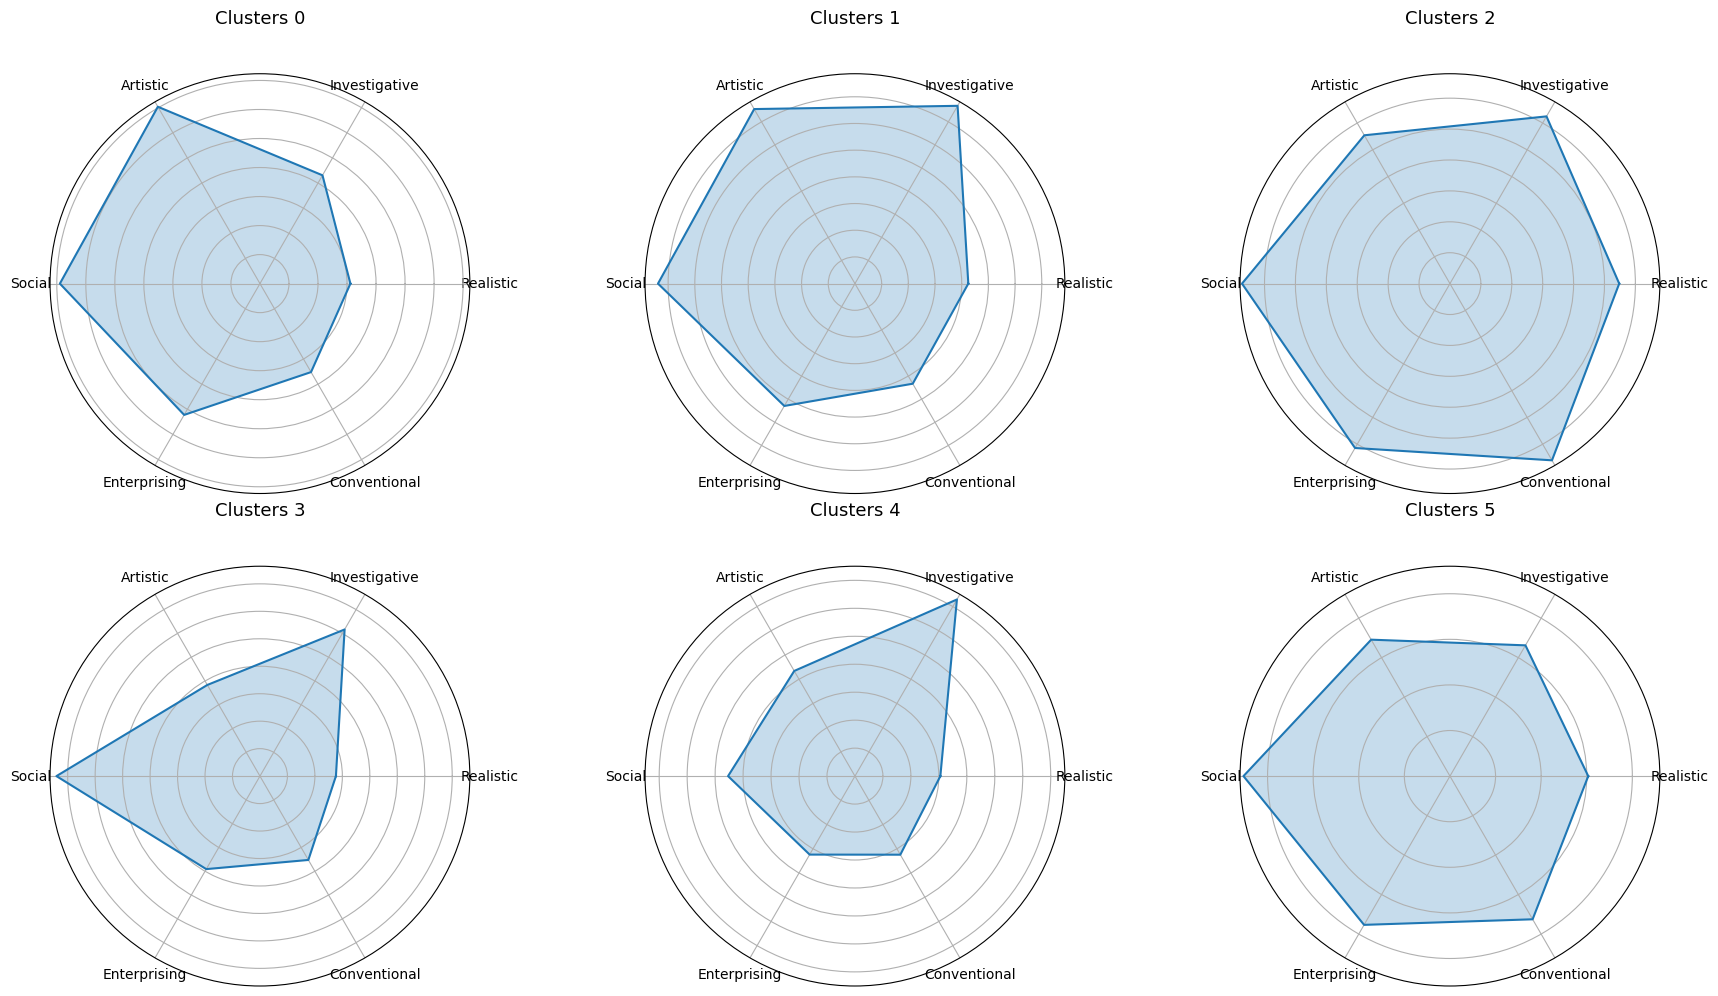

In [58]:
# Define traits and number of variables for the radar chart
traits = ['Realistic', 'Investigative', 'Artistic', 'Social', 'Enterprising', 'Conventional']
labels = np.array(traits)
num_vars = len(labels)

# Calculate the angles for each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop by adding the first angle at the end

# Create a subplot grid for radar charts (2 rows, 4 columns, but only 6 clusters)
fig, axs = plt.subplots(2, 3, figsize=(18, 10), subplot_kw=dict(polar=True))
axs = axs.flatten()

# Plot the radar chart for each cluster
for idx, (cluster_name, values) in enumerate(df.items()):
    # Ensure the values list has the correct number of values, add first value to the end
    values = values.tolist()
    values += values[:1]  # Add the first value to the end to close the loop
    
    # Only plot the first 6 clusters (since there are only 6 clusters in total)
    if idx < len(axs): 
        ax = axs[idx]
        ax.plot(angles, values, label=cluster_name)
        ax.fill(angles, values, alpha=0.25)

        ax.set_title(cluster_name, size=13, y=1.1)
        ax.set_xticks(angles[:-1])  # Remove the last angle (which is duplicated)
        ax.set_xticklabels(labels)  # Set the trait labels on the axes
        ax.set_yticklabels([])  # Hide the radial labels
        
        # Manually set the radial limits (0 to 1) so that 0 appears at the center
        #ax.set_ylim(0, 1)  # Ensure that the center represents 0

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()